### Preparation:

The dataset is related to Portuguese "Vinho Verde" wines. For more info:
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Import the following files:
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv    
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.utils.multiclass import unique_labels
from scipy.stats import ttest_rel

### Question 1
Join the red wine and white wine datasets by adding the rows of one to the other. Assign the joined data to a data frame and name it wine_data_all. (2 points)

The following questions will be answered for wine_data_all.



In [6]:
#Initializing dataset variables with URL
white = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
red = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

#Creating a dataframe for white wine dataset
white_df = pd.read_csv(white, sep=';')
print(f"White Wine dataset has {white_df.shape[0]} rows") #Printing number of rows in white wine dataset

#Creating a dataframe for red wine dataset
red_df = pd.read_csv(red, sep=';')
print(f"Red Wine dataset has {red_df.shape[0]} rows") #Printing number of rows in white wine dataset

# Merging wine dataframes and confirming sum number of rows matches
wine_data_all = pd.concat([red_df, white_df], ignore_index = True)
print(f"Sum of rows in White Wine and Red Wine dataframes: {white_df.shape[0] + red_df.shape[0]} ")
print(f"All wine dataset has {wine_data_all.shape[0]} rows\n")


#Printing first five rows of wine dataset 
print("First 5 rows of All Wine dataset:\n")
wine_data_all.head()

White Wine dataset has 4898 rows
Red Wine dataset has 1599 rows
Sum of rows in White Wine and Red Wine dataframes: 6497 
All wine dataset has 6497 rows

First 5 rows of All Wine dataset:



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Question 2
Check the data types of the attributes. (2 points)

In [8]:
#Checking data types of attributes
print(f"Data types of All Wine dataset:\n\n{wine_data_all.dtypes}")

Data types of All Wine dataset:

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


### Question 3
Are there any missing values in the dataset? How many? You should not print the whole dataset. (2 points)

In [10]:
#Checking for missing values 
missing_values = wine_data_all.isnull()
print(f"Missing values per column in All Wine dataset:\n{missing_values.sum()}")

#Initiating conditional if loop to check the total number of missing values in the dataset 
if missing_values.sum().sum() > 0:
    print(f"\nThere are {missing_values.sum().sum()} missing values in the dataset")
else:
    print(f"\nThere are no missing values in the dataset")

Missing values per column in All Wine dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values in the dataset


### Question 4
What is the correlation between the attributes other than Quality? (8 points)

In [12]:
#Separating target variable from dataset
target = wine_data_all['quality']
wine_data_all_df = wine_data_all.drop(columns=['quality'])

In [13]:
#Checking the descriptive statistics of the All Wine dataset 
print("Descriptive Statistics Summary of All Wine dataset")
wine_data_all.describe()

Descriptive Statistics Summary of All Wine dataset


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [14]:
#Initializing and displaying correlation matrix
cor_matrix = wine_data_all.corr()
print("Correlation Matrix for numeric attributes in All Wine dataset")
cor_matrix

Correlation Matrix for numeric attributes in All Wine dataset


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


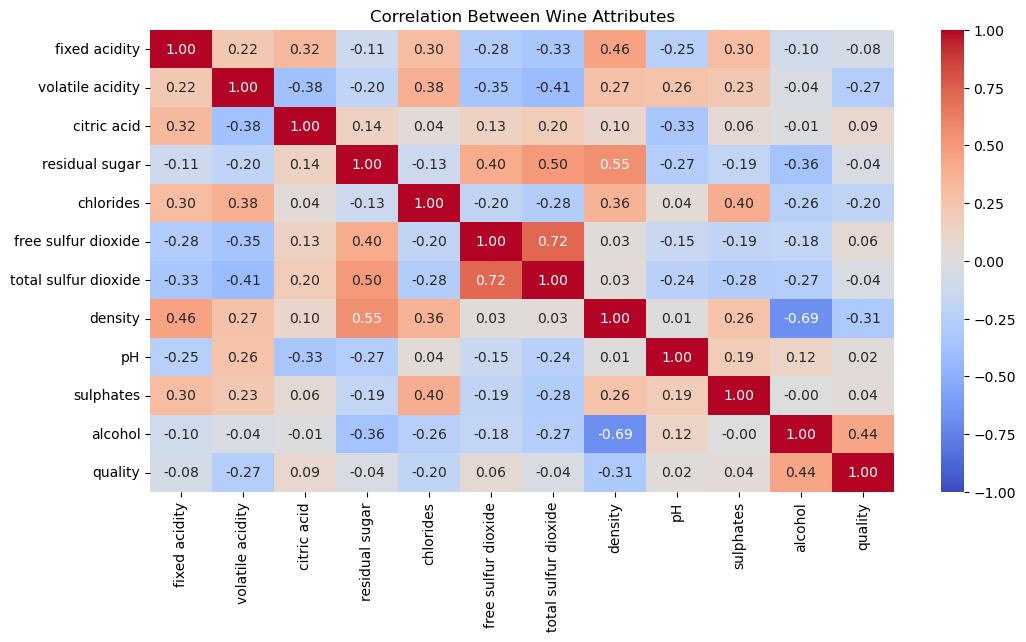

In [15]:
#Visualizing correlation with a heat map
plt.figure(figsize=(12,6))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Between Wine Attributes')
plt.show()

### Question 5
Plot the frequency distribution of wine quality by using the Quality attribute. (8 points)

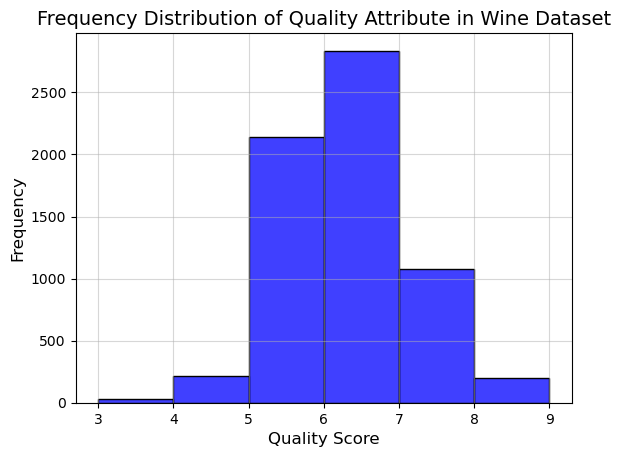

In [17]:
# Plotting a histogram to visualize the Quality attribute distribution
sns.histplot(target, bins=6, binrange=(3, 9), kde=False, color='blue')  # Customize bins and colors as needed
plt.title('Frequency Distribution of Quality Attribute in Wine Dataset', fontsize=14)
plt.xlabel('Quality Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(3, 10))  # Ensure the x-axis ticks match the quality scores
plt.grid(alpha = 0.5) # Add a grid for better readability
plt.show()

### Question 6
Reduce the levels of rating for quality to three levels, i.e., high(2), medium(1), and low(0). Assign the levels 3 and 4 to level 0; 5 and 6 to level 1; and 7, 8, and 9 to level 2. You can use either “high, medium, low” or equivalent numbers. (10 points)

In [19]:
#Creating bins for Quality rating
bins = [2, 4, 6, 9]

#Creating labels for Quality levels 
labels = [0 , 1, 2]

#Categorizing quality values according to the bins created 
target = pd.cut(target, bins=bins, labels=labels, include_lowest = True, ordered= True)

print(f"Updated target type:\n{target.dtypes}")

Updated target type:
category


In [20]:
#Checking distribution of target variable
print(target.value_counts(normalize=True) * 100)

quality
1    76.558412
2    19.655225
0     3.786363
Name: proportion, dtype: float64


quality
1    76.558412
2    19.655225
0     3.786363
Name: proportion, dtype: float64


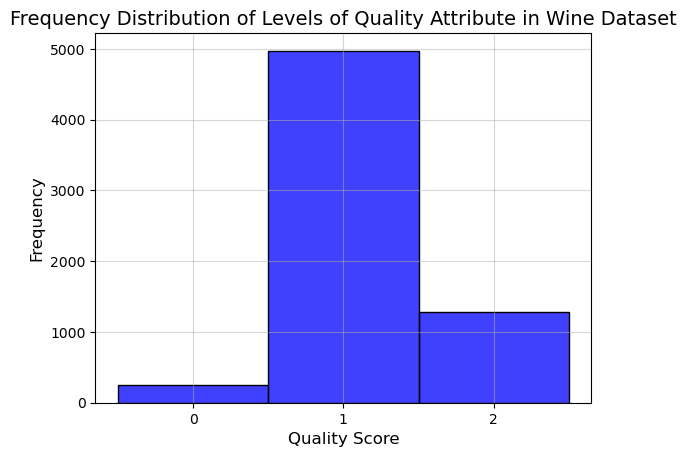

In [21]:
#Checking distribution of target variable
print(target.value_counts(normalize=True) * 100)

# Plotting a histogram to visualize the Quality attribute distribution
sns.histplot(target, bins=3, binrange=(0, 2), kde=False, color='blue')  # Customize bins and colors as needed
plt.title('Frequency Distribution of Levels of Quality Attribute in Wine Dataset', fontsize=14)
plt.xlabel('Quality Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(0, 3))  # Ensure the x-axis ticks match the quality scores
plt.grid(alpha = 0.5) # Add a grid for better readability
plt.show()

### Question 7
Normalize the numeric attributes. Hint: (x - min(x)) / (max(x) - min(x)) (10 points)

In [23]:
#Using the MinMax Scaler to normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(wine_data_all)

In [24]:
#Printing descriptive statistics of the All Wine dataset to confirm normalization 
print("Normalized All Wine Dataset Descriptive Statistics:")
norm_df_summary = pd.DataFrame(X).describe()
norm_df_summary

Normalized All Wine Dataset Descriptive Statistics:


,0,1,2,3,4,5,6,7,8,9,10,11
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.282257,0.173111,0.191948,0.074283,0.078129,0.102518,0.252868,0.146262,0.386435,0.174870,0.361131,0.469730
std,0.107143,0.109758,0.087541,0.072972,0.058195,0.061630,0.130235,0.057811,0.124641,0.083599,0.172857,0.145543
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.214876,0.100000,0.150602,0.018405,0.048173,0.055556,0.163594,0.100829,0.302326,0.117978,0.217391,0.333333
50%,0.264463,0.140000,0.186747,0.036810,0.063123,0.097222,0.258065,0.149990,0.379845,0.162921,0.333333,0.500000
75%,0.322314,0.213333,0.234940,0.115031,0.093023,0.138889,0.345622,0.190476,0.465116,0.213483,0.478261,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Question 8
Divide the dataset to training and test sets. (10 points)

In [127]:
#Renaming target variable 
y = target

# Split data into training and testing sets with 70:30 training to test ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Question 9
Use the Logistic Regression algorithm to predict the quality of wine using its attributes. (12 points)

In [129]:
# Initializing the Logistic Regression model 
log_reg = LogisticRegression()

# Performing Cross-validation on the Training Set
log_cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores on Logistic Regression Model Training Set:", log_cv_scores)
print("Average Cross-Validation Accuracy on Logistic Regression Model Training Set:", log_cv_scores.mean())

Cross-Validation Accuracy Scores on Logistic Regression Model Training Set: [0.96923077 0.96813187 0.9669967  0.96919692 0.9669967 ]
Average Cross-Validation Accuracy on Logistic Regression Model Training Set: 0.9681105912789082


In [131]:
# Training the Logistic regression model on the full training set 
log_reg.fit(X_train, y_train)

LogisticRegression()

In [133]:
# Making Wine Quality Predictions on the Test Set
log_y_pred_test = log_reg.predict(X_test)

### Question 10
Use the KNN algorithm to predict the quality of wine using its attributes. (12 points)

In [135]:
#Best k_value will be determined using Cross-Validation on the training set in order to use Optimal k_value for model fitting
k_values = range(1, 21)
knn_cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    knn_cv_scores.append(scores.mean())

# Determining optimal k_value for kNN algorithm
optimal_k = k_values[np.argmax(knn_cv_scores)]
print("Optimal k value:", optimal_k)

# Creating kNN model with optimal k_value used
knn_alg = KNeighborsClassifier(n_neighbors=optimal_k)

#Obtaining Cross-Validation Scores for optimal k_value
optimalk_cv_scores = cross_val_score(knn_alg, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores on kNN Algorithm Model Training Set:", optimalk_cv_scores)
print("Average Cross-Validation Accuracy on kNN Algorithm Model Training Set:", np.mean(optimalk_cv_scores))

Optimal k value: 4
Cross-Validation Accuracy Scores on kNN Algorithm Model Training Set: [0.98901099 0.99010989 0.99449945 0.9889989  0.99229923]
Average Cross-Validation Accuracy on kNN Algorithm Model Training Set: 0.9909836917757711


In [137]:
#Fitting kNN algorithm on full training set 
knn_alg.fit(X_train, y_train)

# Making Wine Quality predictions on the test Set
knn_y_pred_test = knn_alg.predict(X_test)

### Question 11
Display two confusion matrices to evaluate the performances of Logistic Regression and KNN. (A simple matrix is enough. No need to plot it.) (12 points)

In [139]:
def matrix_table(y_test, y_pred):
    """This function creates a dataframe with the values computed from a confusion matrix for a multiclass target variable and displays
    Predicted labels for the columns and Actual labels for the indices in order to make a more clear and user-friendly view of the matrix
    Parameters:
    y_test (array-like): True labels of the test set.
    y_pred (array-like): Predicted labels from the model.

    Returns:
    pd.DataFrame: A DataFrame representing the confusion matrix."""
    labels = unique_labels(y_test)
    columns = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=columns, index=indices)

    return table

In [141]:
# Confusion Matrix of Logistic Regression Model 
print("Logistic Regression Model Confusion Matrix:\n")
log_matrix = matrix_table(y_test, log_y_pred_test)
print(log_matrix)

# Extracting TP, FP, FN, TN for each class
log_metrics = {}
log_raw_labels = unique_labels(y_test, log_y_pred_test)

for class_label in log_raw_labels:
    tp = log_matrix.at[f'Actual {class_label}', f'Predicted {class_label}']  # True Positives
    fp = log_matrix[f'Predicted {class_label}'].sum() - tp                  # False Positives
    fn = log_matrix.loc[f'Actual {class_label}'].sum() - tp                 # False Negatives
    tn = log_matrix.values.sum() - (tp + fp + fn)                           # True Negatives

    log_metrics[class_label] = {
        'TP': tp,
        'FP': fp,
        'FN': fn,
        'TN': tn
    }

# Print the extracted metrics for each class
print("\nLogistic Regression Confusion Matrix Metrics:")
for class_label, values in log_metrics.items():
    print(f"\nClass: {class_label}")
    print("True Positives (TP):", values['TP'])
    print("False Positives (FP):", values['FP'])
    print("False Negatives (FN):", values['FN'])
    print("True Negatives (TN):", values['TN'])

Logistic Regression Model Confusion Matrix:

          Predicted 0  Predicted 1  Predicted 2
Actual 0           22           56            0
Actual 1            0         1507            0
Actual 2            0            0          365

Logistic Regression Confusion Matrix Metrics:

Class: 0
True Positives (TP): 22
False Positives (FP): 0
False Negatives (FN): 56
True Negatives (TN): 1872

Class: 1
True Positives (TP): 1507
False Positives (FP): 56
False Negatives (FN): 0
True Negatives (TN): 387

Class: 2
True Positives (TP): 365
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 1585


In [143]:
# Confusion Matrix of kNN Algorithm 
print("\nkNN Algorithm Confusion Matrix:\n")
knn_matrix = matrix_table(y_test, knn_y_pred_test)
print(knn_matrix)

# Extracting TP, FP, FN, TN for each class
knn_metrics = {}
knn_raw_labels = unique_labels(y_test, knn_y_pred_test)

for class_label in knn_raw_labels:
    tp = knn_matrix.at[f'Actual {class_label}', f'Predicted {class_label}']  # True Positives
    fp = knn_matrix[f'Predicted {class_label}'].sum() - tp                  # False Positives
    fn = knn_matrix.loc[f'Actual {class_label}'].sum() - tp                 # False Negatives
    tn = knn_matrix.values.sum() - (tp + fp + fn)                           # True Negatives

    knn_metrics[class_label] = {
        'TP': tp,
        'FP': fp,
        'FN': fn,
        'TN': tn
    }

# Print the extracted metrics for each class
print("\nkNN Algorithm Confusion Matrix Metrics:")
for class_label, values in knn_metrics.items():
    print(f"\nClass: {class_label}")
    print("True Positives (TP):", values['TP'])
    print("False Positives (FP):", values['FP'])
    print("False Negatives (FN):", values['FN'])
    print("True Negatives (TN):", values['TN'])


kNN Algorithm Confusion Matrix:

          Predicted 0  Predicted 1  Predicted 2
Actual 0           61           17            0
Actual 1            0         1505            2
Actual 2            0            8          357

kNN Algorithm Confusion Matrix Metrics:

Class: 0
True Positives (TP): 61
False Positives (FP): 0
False Negatives (FN): 17
True Negatives (TN): 1872

Class: 1
True Positives (TP): 1505
False Positives (FP): 25
False Negatives (FN): 2
True Negatives (TN): 418

Class: 2
True Positives (TP): 357
False Positives (FP): 2
False Negatives (FN): 8
True Negatives (TN): 1583


### Question 12
Evaluate the models’ performances by computing Accuracy, Precision, and Recall. If you are using a package to calculate the values, you should explain what you understand from the output of the package by mentioning the exact accuracy, precision, and recall values in your own words. (12 points)


In [145]:
# Evaluating Logistic Regression Model 
log_report = classification_report(y_test, log_y_pred_test, output_dict=True)
final_log_report = pd.DataFrame(log_report).transpose()
print(final_log_report)

              precision    recall  f1-score      support
0              1.000000  0.282051  0.440000    78.000000
1              0.964171  1.000000  0.981759  1507.000000
2              1.000000  1.000000  1.000000   365.000000
accuracy       0.971282  0.971282  0.971282     0.971282
macro avg      0.988057  0.760684  0.807253  1950.000000
weighted avg   0.972311  0.971282  0.963503  1950.000000


In [147]:
# Evaluating kNN Algorithm Model 
knn_report = classification_report(y_test, knn_y_pred_test, output_dict=True)
final_knn_report = pd.DataFrame(knn_report).transpose()
print(final_knn_report)

              precision    recall  f1-score      support
0              1.000000  0.782051  0.877698    78.000000
1              0.983660  0.998673  0.991110  1507.000000
2              0.994429  0.978082  0.986188   365.000000
accuracy       0.986154  0.986154  0.986154     0.986154
macro avg      0.992696  0.919602  0.951665  1950.000000
weighted avg   0.986329  0.986154  0.985652  1950.000000


In [156]:
#Using a paired t-test to determine if there is a statistical difference 
#between machine learning models using the cross-validation fold's accuracy scores
t_statistic, p_value = ttest_rel(log_cv_scores, optimalk_cv_scores)

print("Paired t-test Results:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpretating Paired-ttest Results 
if p_value < 0.01:
    print("\nThere is a highly significant difference between the models.")
elif p_value < 0.05:
    print("\nThere is a significant difference between the models.")
else:
    print("\nThere is no significant difference between the models.")

Paired t-test Results:
t-statistic: -14.899439356066209
p-value: 0.00011817907013159198

There is a highly significant difference between the models.


# Intepretation of Evaluation Metrics 

For each model, Precision, Recall, and Accuracy were calculated for each class, along with additional metrics such as F1-score, macro-average, weighted average, and support. These metrics provide a detailed view of the model's performance, especially in the context of class imbalance, which significantly affects the model's ability to correctly classify instances of wine quality.

### Logistic Regression Model 

Accuracy:

The overall accuracy of the logistics regression model is 0.9712, indicating about 97% of the predictions were correct.

Precision:

Class 0: Precision is 1.0, in which the model correctly identified 100% of the instances it predicted as Class 0. This precision score suggests that the model performs extremely well in identifying low-quality wine.

Class 1: Precision is 0.9641, in which the model correctly identified 96.41% of the instances it predicted as Class 1. This precision score suggests that the model performs well in identifying medium-quality wine.

Class 2: Precision is 1.0, in which the model correctly identified 100% of the instances it predicted as Class 2. This precision score suggests that the model performs extremely well in identifying high-quality wine.

Recall:

Class 0: Recall is 0.2820, meaning among all actual Class 0 instances, about 28% were correctly identified by the model.

Class 1: Recall is 1.0, meaning among all actual Class 1 instances, 100% were correctly identified by the model.

Class 2: Recall is 1.0, meaning among all actual Class 2 instances, 00% were correctly identified by the model.

F1-Score:

Class 0: F1-score is 44%

Class 1: F1-score is 98.17%

Class 2: F1-score is 100%

F1-score for Class 1 is low indicating poor balance between precision and recall possibly due to the imbalance in Class 1 instances in the target variable. Where as for Class 1 and Class 2 F1 scores are excellent indicating the excellent model performance in predicting Class 1 and Class 2 instances.

Support: 

Shows that the there is an imbalance of class in the test set with Class 0 representing 4%, Class 1 representing 77%, and Class 2 representing 19% in the test set with the majority representation of Class 1. 

Macro-Averages:

The Macro-Average computes the mean of a specific metric across all classes equally regardless of their support value. 

Macro-Average Precision: 98.80%

Macro-Average Recall: 76.06%

Macro-Average F1-Score: 80.82%

A macro-average F1-score of 80.82% indicates that the Logistic Regression model performance is good.  Macro-averages shows a more accurate representation of model performance due to imbalance in Class 0 instances in the dataset. 

Weighted-Average:

The Weighted-Average computes the mean of a specific metric with respect to the support proportion therefore accounts to the contribution of each class. 

Weighted-Average Percision: 97.23%

Weighted-Average Recall: 97.12%

Weighted-Average F1-score: 96.35% 
    
High scores of recall is largely contributed to the dominant contribution of Class 1 due to its prevalence in the dataset. Therefore, in this case, the weighted-averages give an inflated view of model performance.

### kNN Algorithm Model

Accuracy:

The overall accuracy is 98.61%, showing an improvement over Logistic Regression Model Accuracy.

Precision:

Class 0: Precision is 1.0, similar to logistics model, kNN algorithm model correctly identified 100% of the instances it predicted as low-quality wine. This precision score suggests that the model performs extremely well in predicting low-quality wine.

Class 1: Precision is 0.9836, in which the model correctly identified 98.36% of the instances it predicted as Class 1. This precision score suggests that the model performs very well in predicting medium-quality wine.

Class 2: Precision is 0.944, in which the model correctly identified 99.44% of the instances it predicted as Class 2. This precision score shows that the model performs very well in predicting high-quality wine.

Recall:

Class 0: Recall is 0.7820, meaning among all actual Class 0 instances, about 78.2%% were correctly identified by the model. kNN algorithm has a higher recall score compared to logistics regression model. This shows that the model has better ability in identifying low-quality wines. 

Class 1: Recall is 0.9986, meaning among all actual Class 1 instances, about 99.86% were correctly identified by the model. This shows that the model is excellent in identifying medium-quality wines. This can be due to high contribution of Class 1 instances in the dataset.

Class 2: Recall is 0.9780, meaning among all actual Class 2 instances, about 97.8% were correctly identified by the model the model does very well in identifying high-quality wines.

F1-Score:

Class 0: F1-score is 87.76%

Class 1: F1-score is 99.11%

Class 2: F1-score is 98.61%

F1-scores for Class 1 and Class 2 demonstrate the model's strength for these classes.
Class 0 has a slightly lower F1-score, again highlighting challenges with the minority class and average balance between precision and recall.

Support: 

Similar to the Logistic Regression Model, support shows that the there is an imbalance of class in the test set with Class 0 representing 4%, Class 1 representing 77%, and Class 2 representing 19% in the test set with the majority representation of Class 1.

Macro-Averages:

The Macro-Average computes the mean of a specific metric across all classes equally regardless of their support value. 

Macro-Average Precision: 99.26%

Macro-Average Recall: 91.96%

Macro-Average F1-Score: 95.16%

The macro-average F1-score of 95.16% indicates that the Logistic Regression model performance is good.  Macro-averages shows a more accurate representation of model performance due to imbalance in Class 0 instances in the dataset.

Weighted-Average:

The Weighted-Average computes the mean of a specific metric with respect to the support proportion therefore the accounts to the contribution of each class. 

Weighted-Average Precision: 98.63%

Weighted-Average Recall: 98.61%

Weighted-Average F1-score: 98.56% 

Increased scores of recall is largely contributed to the dominant contribution of Class 1 due to its prevalence in the dataset.